# Effect of `vivify`, `arenatype` and `cover`

In [ ]:
import subprocess
import re
import pandas as pd
import matplotlib.pyplot as plt

# Define the x-axis parameter and its values
x_axis_name = 'arenatype'
x_axis_param = {x_axis_name: ['1', '2', '3']}

parameter_grid = {
    'vivify': ['true', 'false'],
    'cover': ['true', 'false'],
    'eagersubsume': ['true','false'],
    'score': ['true','false'],
}


metrics_patterns = {
    'restarts': r"c restarts:\s+(\d+)",
    'conflicts': r"c conflicts:\s+(\d+)",
    'time': r"c total process time since initialization:\s+(\d+\.\d+)"
}


results = []

for fixed_arenatype in x_axis_param[x_axis_name]:
    for param_name, param_values in parameter_grid.items():
        for param_value in param_values:
            command = f"./cadical problem_a1.txt --lucky=false --{x_axis_name}={fixed_arenatype} --{param_name}={param_value}"
            print(f"Running: {command}")

            # Run cadical
            result = subprocess.run(command, shell=True, capture_output=True, text=True)
            output = result.stdout


            result_data = {
                x_axis_name: fixed_arenatype,
                param_name: param_value 
            }

            # Extract metrics from the output
            for metric, pattern in metrics_patterns.items():
                match = re.search(pattern, output)
                if match:
                    result_data[metric] = float(match.group(1)) if '.' in match.group(1) else int(match.group(1))
                else:
                    result_data[metric] = None  

            results.append(result_data)


df = pd.DataFrame(results)


def plot_metrics(df, x_axis_param_name, metric_to_plot, grouping_param):
    plt.figure(figsize=(10, 6))

    for group_value in df[grouping_param].unique():
        subset = df[df[grouping_param] == group_value]
        
        plt.plot(subset[x_axis_param_name], subset[metric_to_plot], 
                 marker='o', linestyle='-', 
                 label=f'{grouping_param}: {group_value}')

    plt.title(f"{metric_to_plot.capitalize()} vs {x_axis_param_name.capitalize()} by {grouping_param.capitalize()} Value")
    plt.xlabel(x_axis_param_name.capitalize())
    plt.ylabel(metric_to_plot.capitalize())
    plt.xticks(subset[x_axis_param_name])
    plt.legend(title=grouping_param.capitalize())
    plt.grid()
    plt.tight_layout()
    plt.show()



Running: ./cadical problem_a1.txt --lucky=false --arenatype=1 --vivify=true
Running: ./cadical problem_a1.txt --lucky=false --arenatype=1 --vivify=false
Running: ./cadical problem_a1.txt --lucky=false --arenatype=1 --cover=true
Running: ./cadical problem_a1.txt --lucky=false --arenatype=1 --cover=false
Running: ./cadical problem_a1.txt --lucky=false --arenatype=1 --eagersubsume=true


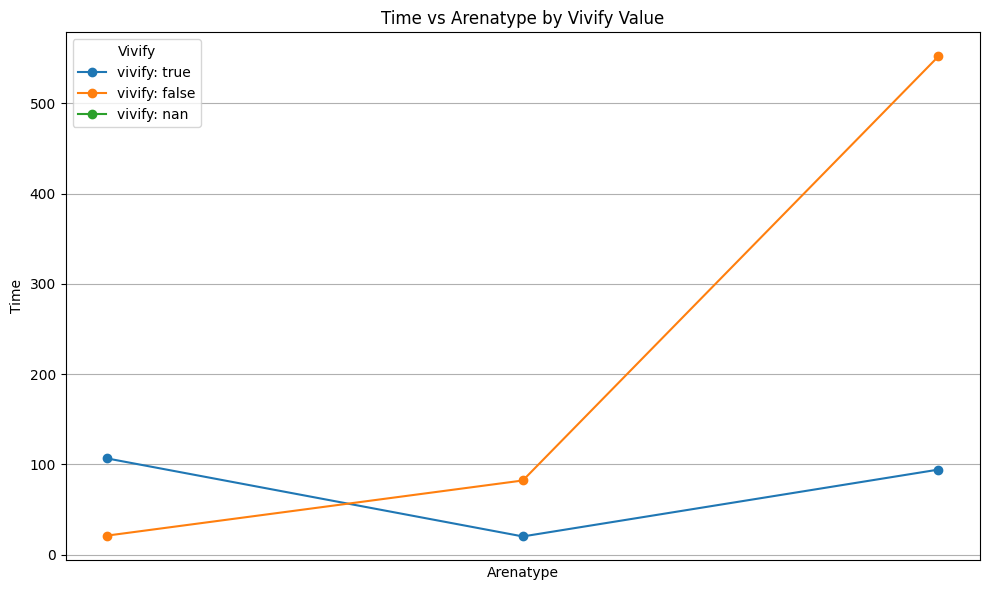

In [ ]:
plot_metrics(df, x_axis_name, 'time','vivify')

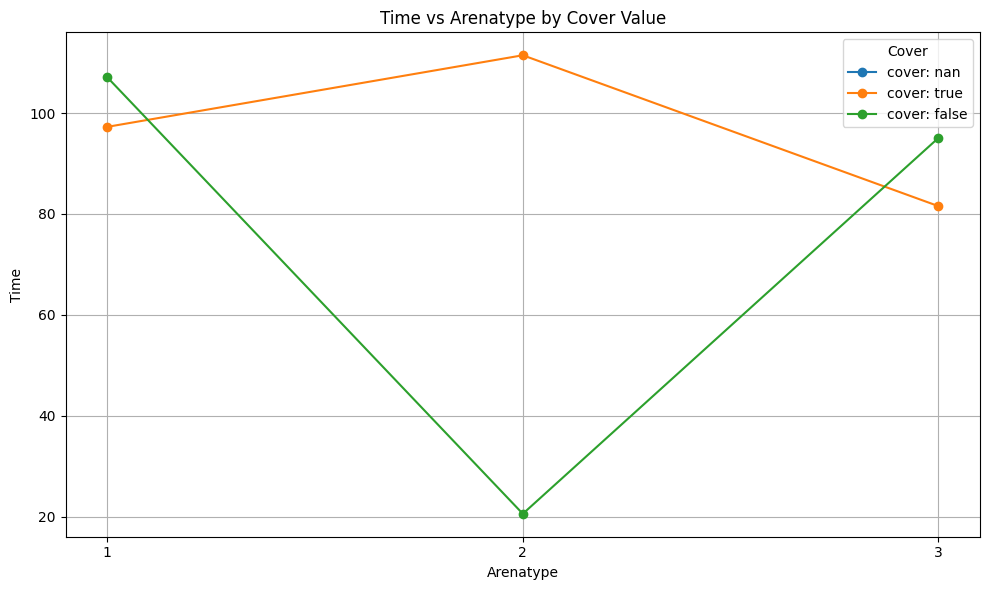

In [ ]:
plot_metrics(df, x_axis_name, 'time','cover')

In [ ]:
plot_metrics(df, x_axis_name, 'time','eagersubsume')

In [ ]:
plot_metrics(df, x_axis_name, 'time','score')